In [28]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv
load_dotenv()
from IPython.display import Image, display


GROQ_API_KEY = os.getenv("GROQ_API_KEY")


In [29]:
#llm=ChatGroq(model="qwen-2.5-32b")
llm =ChatGroq(model="deepseek-r1-distill-llama-70b")
result=llm.invoke("Hello")
result

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.072757685, 'prompt_time': 5.6989e-05, 'queue_time': 0.092519131, 'total_time': 0.072814674}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--768dfe33-657e-4c28-971e-4def7d2665dc-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [30]:
class State(TypedDict):
    topic: str
    blog:str
    improved_blog:str
    final_blog:str

    

In [31]:
State = dict  # Replace with your actual state type if defined

# Node function
def get_topic(state: dict) -> dict:
    """Get topic from user, then use LLM to write blog"""
    msg = llm.invoke(f"Write a blog about {state['topic']}")
    return {"blog": msg.content}

In [20]:
def check_blog(state:State):
     """Gate function to check if the blog has a punchline"""
    # Simple check - does the joke contain "?" or "!"
     if "?" in state["blog"] or "!" in state["blog"]:
        return"fail"
     return "pass"

In [32]:
def improve_blog(state:State):
    """LLM omproves blog"""
    msg= llm.invoke(f"improve this blog by using wordplay and humor{state['blog']}")
    return{"improved blog ":msg.content}

def polish_blog(state: State):
    """Third LLM call for final polish"""

    msg = llm.invoke(f"Add a surprising twist to this blog: {state['improve_blog']}")
    return {"final_blog": msg.content}


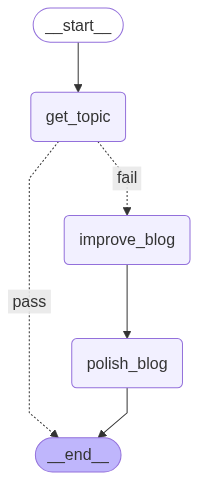

{'topic': 'cats', 'blog': "<think>\nOkay, so I need to write a blog about cats. Hmm, where do I start? I guess I should think about what I know about cats and what people might find interesting. Let me brainstorm some ideas.\n\nFirst off, cats are popular pets, so maybe I should talk about why they make good companions. They're usually independent, but they can also be affectionate. That's a good point. People like that they don't need as much attention as dogs, maybe.\n\nI remember reading somewhere that cats have some interesting communication methods. They use body language a lot, like tail positions and ear movements. Oh, and they purr, which isn't just for communication but also for self-soothing. That could be a neat section.\n\nOh, the history of cats! They've been around for thousands of years. I think they were worshipped in ancient Egypt. That's a fascinating angle. How did they become domesticated? I'm not entirely sure, but I can look that up. Maybe they started as wild ani

In [35]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display

# Step 0: Define your state
class State(TypedDict):
    topic: str
    blog: str
    improved_blog: str
    final_blog: str

# Step 1: Define all your functions
def get_topic(state: State) -> dict:
    """Generate blog content from a topic."""
    msg = llm.invoke(f"Write a blog about {state['topic']}")
    return {"blog": msg.content}

def check_blog(state: State) -> str:
    """Gate function to check if the blog has a punchline."""
    if "?" in state["blog"] or "!" in state["blog"]:
        return "fail"
    return "pass"

def improve_blog(state: State) -> dict:
    """LLM improves blog with humor."""
    msg = llm.invoke(f"Improve this blog using wordplay and humor: {state['blog']}")
    return {"improved_blog": msg.content}

def polish_blog(state: State) -> dict:
    """Final polish with a twist."""
    msg = llm.invoke(f"Add a surprising twist to this blog: {state['improved_blog']}")
    return {"final_blog": msg.content}

# Step 2: Build the workflow
workflow = StateGraph(State)

workflow.add_node("get_topic", get_topic)
workflow.add_node("improve_blog", improve_blog)
workflow.add_node("polish_blog", polish_blog)

workflow.add_edge(START, "get_topic")
workflow.add_conditional_edges("get_topic", check_blog, {"fail": "improve_blog", "pass": END})
workflow.add_edge("improve_blog", "polish_blog")
workflow.add_edge("polish_blog", END)

# Step 3: Compile and run
chain = workflow.compile()

# Optional: visualize
display(Image(chain.get_graph().draw_mermaid_png()))

# Step 4: Invoke the workflow
state = chain.invoke({"topic": "cats"})
print(state)


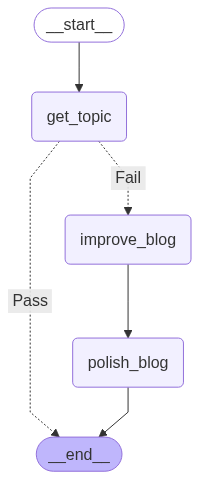

In [23]:
# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("get_topic",get_topic)
workflow.add_node("improve_blog",improve_blog)
workflow.add_node("polish_blog",polish_blog)

# Add edges to connect nodes
workflow.add_edge(START, "get_topic")
workflow.add_conditional_edges("get_topic",check_blog,{"Fail":"improve_blog","Pass":END})
workflow.add_edge("improve_blog", "polish_blog")
workflow.add_edge("polish_blog", END)


# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

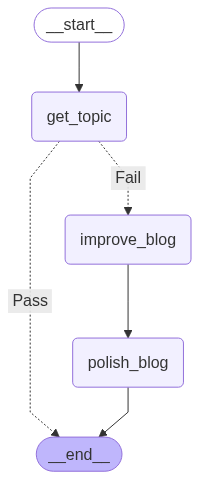

KeyError: 'fail'

In [33]:
# Create the workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("get_topic", get_topic)
workflow.add_node("improve_blog", improve_blog)
workflow.add_node("polish_blog", polish_blog)

# Add edges
workflow.add_edge(START, "get_topic")
workflow.add_conditional_edges("get_topic", check_blog, {"Fail": "improve_blog", "Pass": END})
workflow.add_edge("improve_blog", "polish_blog")
workflow.add_edge("polish_blog", END)

# Compile
chain = workflow.compile()

# Optional: show workflow graph
display(Image(chain.get_graph().draw_mermaid_png()))

# Run the workflow with initial input
state = chain.invoke({"topic": "cats"})
print(state)